In [1]:
from ase.io import read

import os
import re
import html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def extract_number(subdir):
    match = re.search(r'(\d+)', subdir)
    return int(match.group(1)) if match else float('inf')

def get_subdirectory_paths(directory_path):
    entries = os.listdir(directory_path)
    subdirs = [os.path.join(directory_path, entry) for entry in entries]
    sorted_subdirs = sorted(subdirs, key=extract_number)
    return sorted_subdirs

def get_H_position(poscar_file_path):
    atoms = read(poscar_file_path)
    pos = atoms.get_positions()
    h_pos = list([pos[i] for i in range(len(atoms)) if atoms[i].symbol == 'H'][0])
    return h_pos
    

In [3]:
au_dir_path = '../../Data/geometry_relaxation_and_zpe/Au-STO/H-Au-STO/H-Au/'
sto_dir_path = '../../Data/geometry_relaxation_and_zpe/Au-STO/H-Au-STO/H-STO/'
file_path = '../../Data/geometry_relaxation_and_zpe/crr_intermediates_au-sto.xlsx'

au_subdirs = get_subdirectory_paths(au_dir_path)
sto_subdirs = get_subdirectory_paths(sto_dir_path)

h_pos_of_au = np.array([get_H_position(f'{au_subdirs[i]}/CONTCAR') \
                        for i in range(len(au_subdirs))])
h_pos_of_sto = np.array([get_H_position(f'{sto_subdirs[i]}/CONTCAR') \
                         for i in range(len(sto_subdirs))])

data = pd.read_excel(file_path, sheet_name='H-BE')
G_BE = data['G_BE'].dropna()[data['G_BE'].apply(lambda x: isinstance(x, float))]

## Binding energy scatter plot

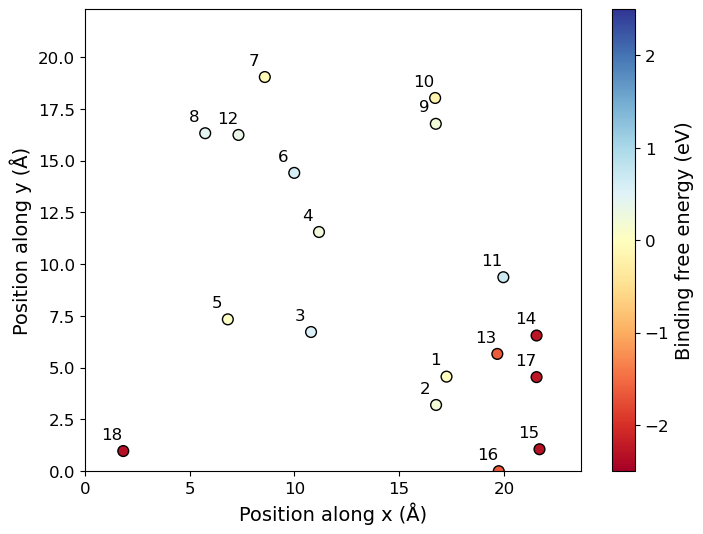

In [4]:
#cmap = plt.cm.get_cmap('RdYlBu')
cmap = plt.cm.RdYlBu

# scatter plot
plt.figure(figsize=(8,6))
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 

a = read(f'{au_subdirs[0]}/POSCAR')
cell = a.get_cell().copy()

plt.scatter(h_pos_of_au[:,0], h_pos_of_au[:,1], c=G_BE[:len(h_pos_of_au)], 
            s=60, cmap=cmap, vmin=-2.5, vmax=2.5, marker='o', edgecolor='black')
plt.scatter(h_pos_of_sto[:,0], h_pos_of_sto[:,1], c=G_BE[-len(h_pos_of_sto):], 
            s=60, cmap=cmap, vmin=-2.5, vmax=2.5, marker='o', edgecolor='black')

for i in range(len(h_pos_of_au)):
    plt.annotate(str(i+1), 
                 (h_pos_of_au[i][0], h_pos_of_au[i][1]), 
                 textcoords="offset points",  
                 xytext=(-8, 12),            
                 ha='center',                 
                 va='center',               
                 fontsize=12)

for i in range(len(h_pos_of_sto)):
    plt.annotate(str(i+1+len(h_pos_of_au)), 
                 (h_pos_of_sto[i][0], h_pos_of_sto[i][1]), 
                 textcoords="offset points",  
                 xytext=(-8, 12),            
                 ha='center',                 
                 va='center',               
                 fontsize=12)

plt.xlabel(f'Position along x ({html.unescape("&Aring;")})', fontsize=14)
plt.ylabel(f'Position along y ({html.unescape("&Aring;")})', fontsize=14)
plt.colorbar().set_label('Binding free energy (eV)', fontsize=14) 
plt.xlim(0, cell[0][0])
plt.ylim(0, cell[1][1])
plt.show()